In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras import Sequential
from keras.layers import Dense
from keras.regularizers import L1,L2,L1L2
from keras.optimizers import SGD


from mlxtend.plotting import plot_decision_regions

In [ ]:
# used for decision space for 2D

# X in 2D -- ARRAY FORMAT
# y in 1D -- int , array

In [ ]:
# df = pd.read_csv(r"C:\Users\hp\Downloads\Data Science Innomatics\DS written notes\Deep_learning\DL_Assignments\1.ushape.csv", header = None)

In [2]:
df = pd.read_csv(r"C:\Users\Utteja\Downloads\Data science innomatics\DEEP_LEARNING\Deep_ learning assenment\Multiple CSV\1.ushape.csv",header = None)

In [3]:
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [5]:
x = df.iloc[:,0:2]
y = df.iloc[:,2].astype(int)

In [6]:
x.shape

(100, 2)

In [7]:
y.shape

(100,)

<AxesSubplot:xlabel='0', ylabel='1'>

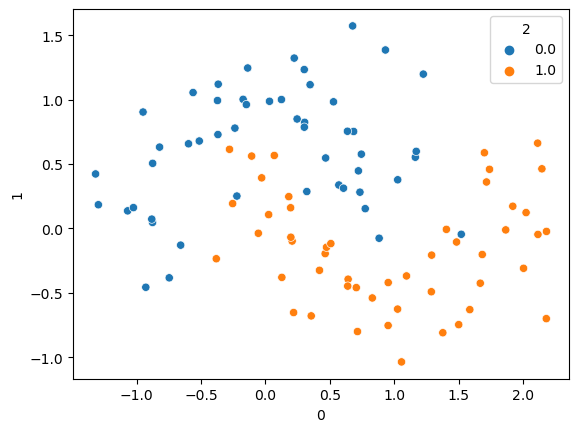

In [8]:
sns.scatterplot(data = df, x=0,y=1, hue = 2)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.1, random_state = 0)

In [10]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(90, 2) (10, 2) (90,) (10,)


In [11]:
std = StandardScaler()
x_trainp = std.fit_transform(x_train)
x_testp = std.transform(x_test)

In [12]:
model=Sequential()
model.add(Dense(16,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(10,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(8,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(4,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])

history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 1s 28ms/step - loss: 0.6013 - accuracy: 0.7284 - val_loss: 0.3715 - val_accuracy: 0.8889
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4614 - accuracy: 0.8642 - val_loss: 0.2992 - val_accuracy: 0.8889
Epoch 3/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4338 - accuracy: 0.8519 - val_loss: 0.2615 - val_accuracy: 0.8889
Epoch 4/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4194 - accuracy: 0.8395 - val_loss: 0.2466 - val_accuracy: 0.8889
Epoch 5/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4221 - accuracy: 0.8519 - val_loss: 0.2225 - val_accuracy: 1.0000
Epoch 6/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4167 - accuracy: 0.8395 - val_loss: 0.2140 - val_accuracy: 1.0000
Epoch 7/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4160 - accuracy: 0.8519 - val_loss: 0.2314 - val_accuracy: 0.8889
Epoch 8/20
17/17 [=

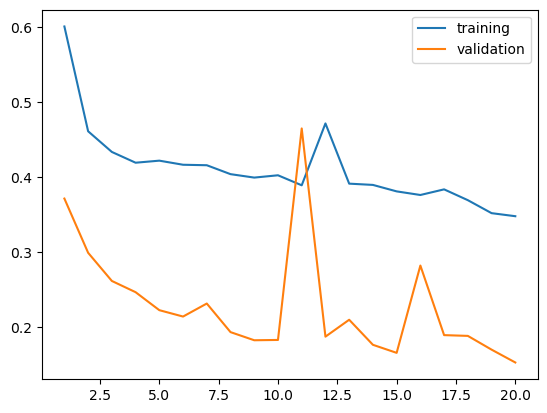

In [15]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 14s 1ms/step


<AxesSubplot:>

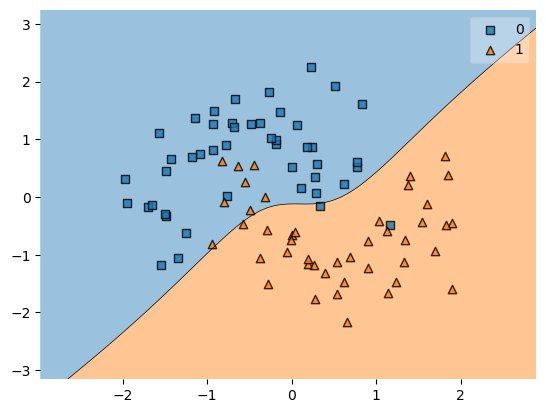

In [16]:
plot_decision_regions(x_trainp,y_train.values,clf=model)

9600/9600 [==============================] - 15s 2ms/step


<AxesSubplot:>

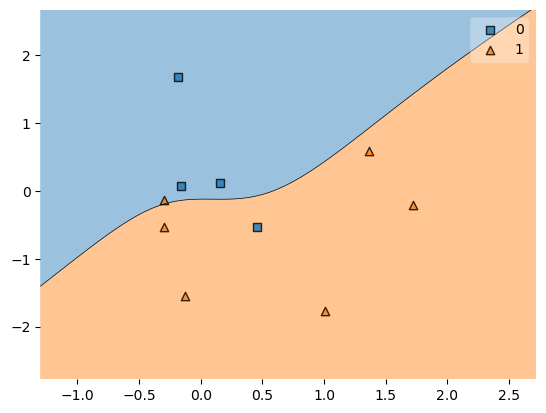

In [17]:
plot_decision_regions(x_testp,y_test.values,clf=model)